In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
sys.path.append("../..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
import os
import json
import numpy as np
import pandas as pd
from explorer.utils import load_states_from_dir
import matplotlib.pyplot as plt

In [245]:
log_dir = "/Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/ultimatum_3_period"
log_dir_one_shot = "/Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/ultimatum_one_shot"
game_states = load_states_from_dir(log_dir) #+ load_states_from_dir(log_dir) 

game_states_one_shot = load_states_from_dir(log_dir_one_shot)


Exception Type: AssertionError
Exception Message: WARNING : Game  /Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/ultimatum_3_period/1701958956348/game_state.json has not ended

Stack Trace:
Traceback (most recent call last):
  File "../../explorer/utils.py", line 111, in load_states_from_dir
    assert (
AssertionError: WARNING : Game  /Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/ultimatum_3_period/1701958956348/game_state.json has not ended



Exception Type: AssertionError
Exception Message: WARNING : Game  /Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/ultimatum_3_period/1701972360377/game_state.json has not ended

Stack Trace:
Traceback (most recent call last):
  File "../../explorer/utils.py", line 111, in load_states_from_dir
    assert (
AssertionError: WARNING : Game  /Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/ultimatum_3_period/1701972360377/game_state.json has not ended


THERE ARE 455 log files
453 Loaded Successfully

Excep

In [246]:
def player_two_acceptance(game_states):
    decision = [ g.game_state[2]['player_public_info_dict']['player answer']for g in game_states if len(g.game_state) == 4] 
    trades = [ g.game_state[1]['player_public_info_dict']['newly proposed trade']for g in game_states if len(g.game_state) == 4] 
    # for idx, _ in enumerate(trades):
    #     print(idx, _)
    proposal_values = np.array([t.resources_from_first_agent.value() for t in trades])
    df = pd.DataFrame(list(zip(proposal_values, decision)), columns=['amount', 'decision'])
    df['amount'] = df['amount'].astype(int)
    return df

def player_one_acceptance(game_states):
    decision = [ g.game_state[3]['player_public_info_dict']['player answer']for g in game_states if len(g.game_state) == 5] 
    trades = [ g.game_state[2]['player_public_info_dict']['newly proposed trade']for g in game_states if len(g.game_state) == 5] 
    # for idx, _ in enumerate(trades):
    #     print(idx, _)
    proposal_values = np.array([t.resources_from_first_agent.value() for t in trades])
    df = pd.DataFrame(list(zip(proposal_values, decision)), columns=['amount', 'decision'])
    df['amount'] = df['amount'].astype(int)
    return df



In [247]:
df_one_shot = player_two_acceptance(game_states_one_shot)
df_one_shot['decision'] = df_one_shot['decision'] == 'ACCEPTED'
df_one_shot= df_one_shot.groupby('amount')['decision'].agg(['mean','count'])#)mean().reset_index(name='mean')
df_one_shot

,mean,count
amount,,
0,0.7,10
1,1.0,22
2,1.0,20
3,1.0,20
4,1.0,20
5,1.0,20
6,1.0,20
7,1.0,20
8,1.0,21


In [248]:
df = player_one_acceptance(game_states)
df[df['amount']==0.0]

df['decision'] = df['decision'] == 'ACCEPTED'
df= df.groupby('amount')['decision'].agg(['mean','count'])#)mean().reset_index(name='mean')
df


,mean,count
amount,,
0,0.684211,19
1,1.000000,19
2,1.000000,16
3,1.000000,19
4,1.000000,18
5,0.958333,24
6,1.000000,22
7,1.000000,21
8,1.000000,19


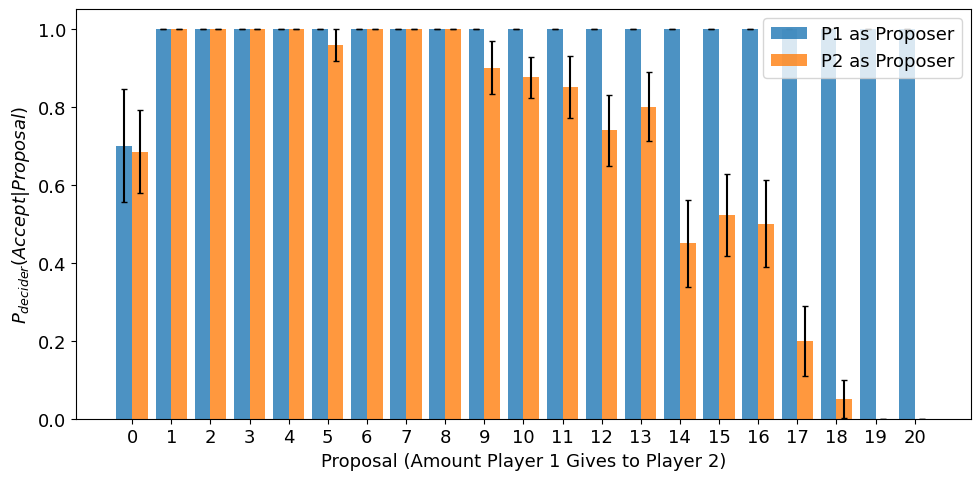

In [272]:
sd = lambda row : ( row[0]*(1-row[0]) / row[1]) ** 0.5
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(
    np.arange(21).astype(int)-0.2,
    df_one_shot['mean'],
    yerr=[df_one_shot.apply(sd, axis=1)],
    capsize=2,
    alpha=0.8,
    width=0.4,
    align='center')

ax.bar(
    np.arange(21).astype(int)+0.2,
    df['mean'],
    yerr=[df.apply(sd, axis=1)],
    capsize=2,
    alpha=0.8,
    width=0.4,
    align='center')

plt.xticks(np.arange(21))
plt.xlabel('Proposal (Amount Player 1 Gives to Player 2)')
plt.ylabel('$P_{decider}( Accept | Proposal )$')
plt.tight_layout()
plt.legend(['P1 as Proposer', 'P2 as Proposer',],loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('ultimatum_acceptance_probability.pdf')  
